## Dataset Overview

- We will be using the Kaggle dataset `Heart.csv`, which includes various patient features. 
- Among these features, the target variable is `AHD` (Angina or Heart Disease), which indicates whether the patient has a history of angina or heart disease.

- For more details on the dataset, you can refer to the Kaggle page from which this dataset is sourced: [Heart.csv](https://www.kaggle.com/datasets/zhaoyingzhu/heartcsv)

In [152]:
import pandas as pd
df = pd.read_csv('Heart.csv')
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


## Feature Selection

- Identify the features that are helpful for our analysis.
- Determine the type of each feature: whether it is binary, continuous, ordinal, or categorical.
- Checking for missing values

### Feature Types

- **Binary:** Sex, Fbs, ExAng
- **Categorical:** ChestPain, RestECG, Thal
- **Ordinal:** Slope, Ca
- **Continuous:** Age, RestBP, Chol, MaxHR, Oldpeak

## Input features and target
- Target `output` will be converted to binary values (0 and 1).
- Input feature `data` will include only those features with meaningful information.

In [153]:
output = df['AHD'].map({'No': 0, 'Yes': 1})
data = df.drop(columns=['Unnamed: 0', 'AHD'])

## Distribution of AHD

Understanding the distribution of the target is crucial for assessing whether our dataset is balanced or imbalanced. 
- **Balanced Dataset:** No need for sampling methods like oversampling or undersampling.
- **Current Status:** Our dataset is reasonably balanced.

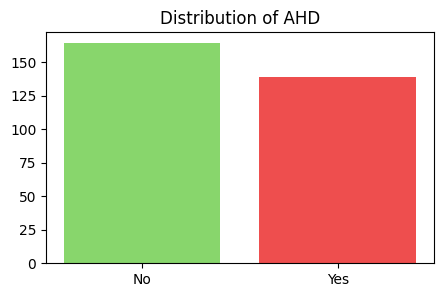

In [154]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 3))

count_zeros = (output == 0).sum()
count_ones = output.sum()

ax.bar(x=['No', 'Yes'], height=[count_zeros, count_ones], color=['#88D66C', '#EE4E4E'])
ax.set_title('Distribution of AHD')

plt.show()

## Features with missing values
- Ca, Thal

In [155]:
print(f'Number of missing data: {data['Ca'].isna().sum()}')
print(f'Number of missing data: {data['Thal'].isna().sum()}')
print(f"Missing in percentage: {data['Ca'].isna().mean() * 100:.2f}%")
print(f"Missing in percentage: {data['Thal'].isna().mean() * 100:.2f} %")

Number of missing data: 4
Number of missing data: 2
Missing in percentage: 1.32%
Missing in percentage: 0.66 %


## Imputation Method

- Given that our dataset has only a small percentage of missing values, advanced imputation methods are unnecessary. 
- We use `SimpleImputer` with the `most_frequent` strategy, as our features are categorical.
- With a larger number of missing values, the recommended approach is to perform imputation on the training set first and then use the training-set statistics to impute missing values in the test set.

In [156]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
data[['Ca', 'Thal']] = imputer.fit_transform(data[['Ca', 'Thal']])

## Encoding Categorical Features

- Since our dataset contains categorical values, we need to convert them into numerical representations.

In [157]:
data = pd.get_dummies(data, columns=['ChestPain', 'RestECG', 'Thal']).astype(int)
data

,Age,Sex,RestBP,Chol,Fbs,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,RestECG_0,RestECG_1,RestECG_2,Thal_fixed,Thal_normal,Thal_reversable
0,63,1,145,233,1,150,0,2,3,0,0,0,0,1,0,0,1,1,0,0
1,67,1,160,286,0,108,1,1,2,3,1,0,0,0,0,0,1,0,1,0
2,67,1,120,229,0,129,1,2,2,2,1,0,0,0,0,0,1,0,0,1
3,37,1,130,250,0,187,0,3,3,0,0,1,0,0,1,0,0,0,1,0
4,41,0,130,204,0,172,0,1,1,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,110,264,0,132,0,1,2,0,0,0,0,1,1,0,0,0,0,1
299,68,1,144,193,1,141,0,3,2,2,1,0,0,0,1,0,0,0,0,1
300,57,1,130,131,0,115,1,1,2,1,1,0,0,0,1,0,0,0,0,1
301,57,0,130,236,0,174,0,0,2,1,0,0,1,0,0,0,1,0,1,0


## Multiple Train-Test Splits

- To ensure our models are robust and have well-tuned parameters, we will create 20 different train-test splits.
- Then evaluate the performance of our models across all these splits to obtain a comprehensive assessment.

In [158]:
for i in range(1, 21):
    # create directory{i} inside datasets
    !mkdir datasets/dataset{i}

In [159]:
from sklearn.model_selection import train_test_split


for i in range(1, 21):
    X_train, X_test, y_train, y_test = train_test_split(data, output, test_size=0.2, stratify=output, random_state=i)
    
    dataset_path = f'datasets/dataset{i}'
    
    X_train.to_csv(f'{dataset_path}/input_train.csv', index=False)
    y_train.to_csv(f'{dataset_path}/output_train.csv', index=False)

    X_test.to_csv(f'{dataset_path}/input_test.csv', index=False)
    y_test.to_csv(f'{dataset_path}/output_test.csv', index=False)